In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
%matplotlib widget

from string import ascii_uppercase

# plt.rcParams.update({"text.usetex": True})

In [2]:
cd = pd.read_csv('/home/ssong/figs/colon-CD-B/path-mean-counts-colon-CD-B.csv')
uc = pd.read_csv('/home/ssong/figs/colon-UC-B/path-mean-counts-colon-UC-B.csv')

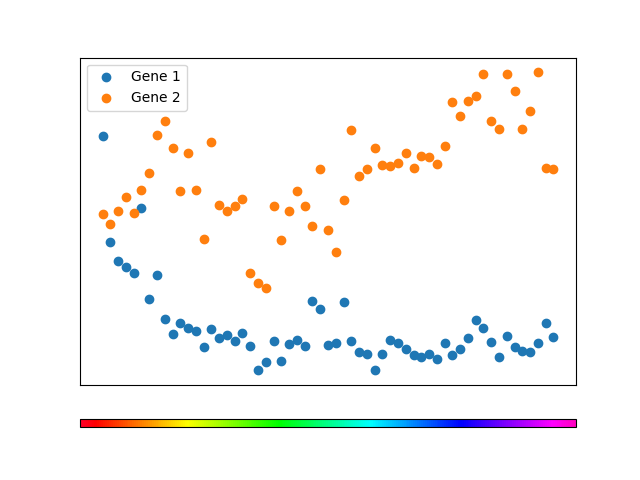

In [3]:
# dummy plot for overview figure

from matplotlib import colormaps
from matplotlib.cm import ScalarMappable

fig, (ax, cax) = plt.subplots(nrows=2, height_ratios=[0.975, 0.025])
ax.scatter(np.arange(len(uc)), uc['EPCAM'], label='Gene 1')
ax.scatter(np.arange(len(uc)), uc['ACTA2'], label='Gene 2')
ax.set_xticks([])
ax.set_yticks([])
ax.legend()

cmap = colormaps['gist_rainbow']
sm = ScalarMappable(cmap=cmap)
fig.colorbar(sm, cax, orientation='horizontal')
cax.set_xticks([])
cax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
# plt.tight_layout()

In [4]:
def get_top_genes(df, n):
    fits = np.polyfit(np.arange(len(df)), df, 1)
    gene_std = df.std().sort_values(ascending=False)
    gene_mean = df.mean().sort_values(ascending=False)
    gene_diff = (df.max() - df.min()).sort_values(ascending=False)
    gene_min = df.min().sort_values(ascending=False)
    gene_slope = pd.DataFrame(fits.T, columns=['slope', 'intercept'], index=df.columns).sort_values('slope', ascending=False)['slope']

    tn_pos_slope = list(gene_slope.head(n).index)
    tn_neg_slope = list(gene_slope.tail(n).index)
    tn_std = list(gene_std.head(n).index)
    tn_mean = list(gene_mean.head(n).index)
    tn_diff = list(gene_diff.head(n).index)
    tn_min = list(gene_min.head(n).index)

    return tn_std, tn_mean

In [5]:
cd_std, cd_mean = get_top_genes(cd, 5)
uc_std, uc_mean = get_top_genes(uc, 5)

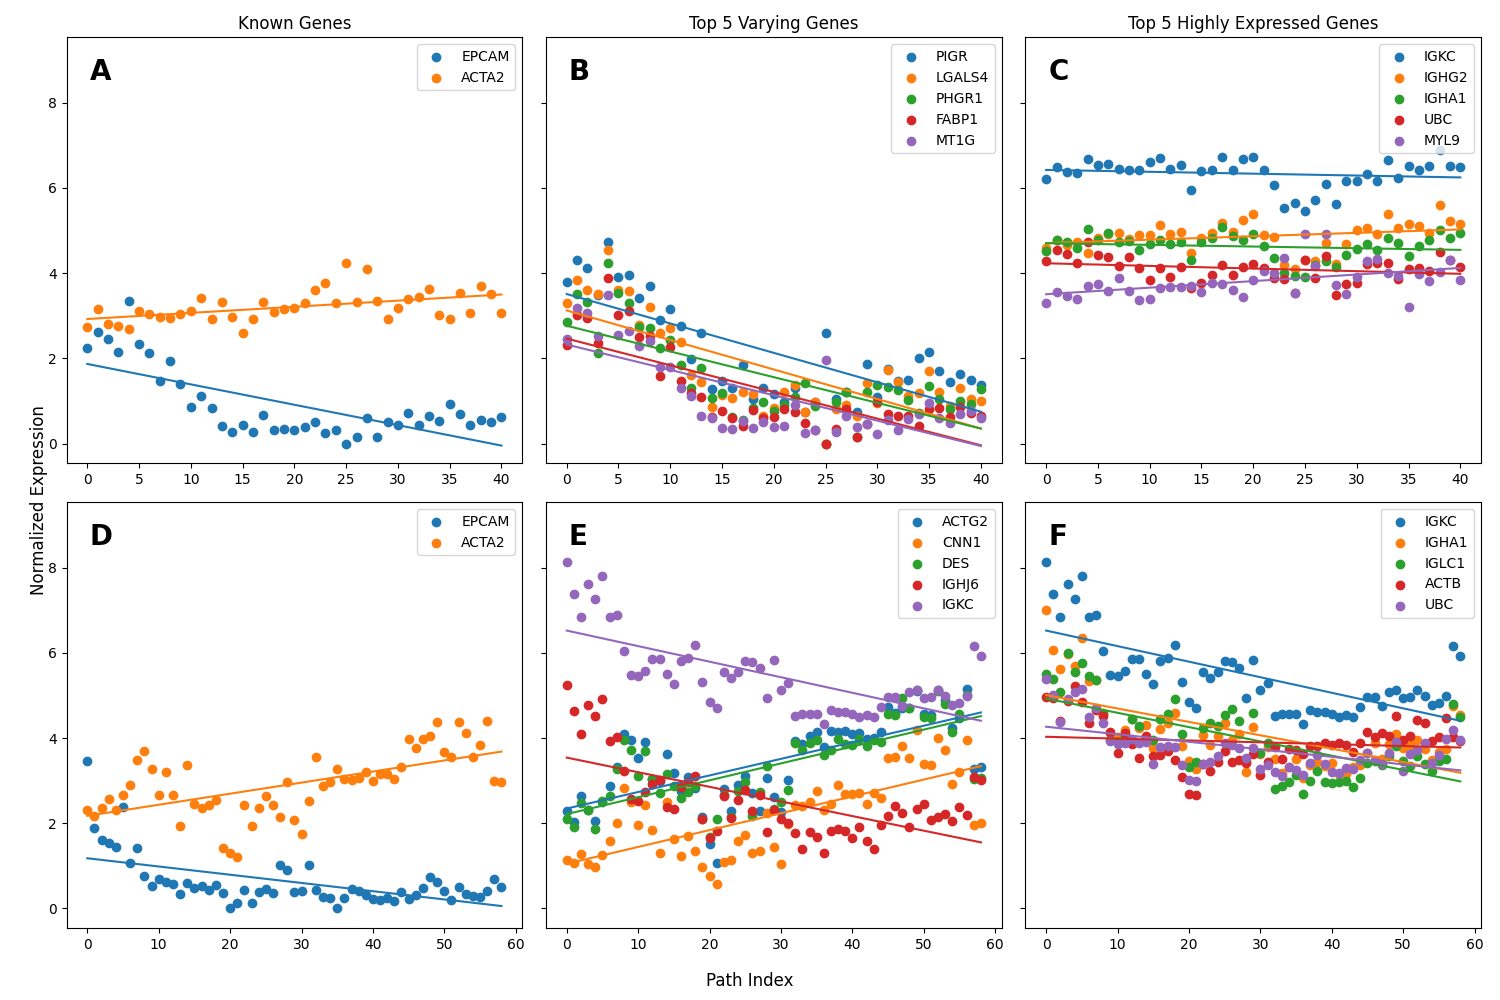

In [6]:
OFFSET=0.1
figsize=5
fig, ((cdax1, cdax2, cdax3), (ucax1, ucax2, ucax3)) = plt.subplots(nrows=2, ncols=3, figsize=(3*figsize, 2*figsize), sharey=True)
to_plot = [
    (cdax1, cd, ['EPCAM', 'ACTA2']),
    (cdax2, cd, cd_std),
    (cdax3, cd, cd_mean),
    (ucax1, uc, ['EPCAM', 'ACTA2']),
    (ucax2, uc, uc_std),
    (ucax3, uc, uc_mean),
]
for count, (ax, df, genes) in enumerate(to_plot):
    path = np.arange(len(df))
    for gene in genes:
        ax.scatter(path, df[gene], label=gene)
        ax.plot(path, np.poly1d(np.polyfit(path, df[gene], 1))(path))
    ax.legend(loc='upper right')
    ax.text(OFFSET/2, 1-OFFSET, ascii_uppercase[count], transform=ax.transAxes, size=20, weight='bold')
cdax1.set_title("Known Genes")
cdax2.set_title("Top 5 Varying Genes")
cdax3.set_title("Top 5 Highly Expressed Genes")
ylim = cdax1.get_ylim()
ylim = ylim[0], ylim[1] + 1
cdax1.set_ylim(ylim)
fig.supxlabel('Path Index')
fig.supylabel(r'Normalized Expression')
plt.tight_layout()

In [40]:
plt.savefig('/home/ssong/figs/gene-trajectories.png')